# Imports

## Libraries

In [1]:
### Basic Libraries
# !pip install numpy
import numpy as np
# !pip install pandas
import pandas as pd

### Visualization
# !pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install seaborn
import seaborn as sns
sns.set()
sns.set_theme(context='talk', palette='Dark2')
# !pip install ipywidgets
from tqdm.notebook import tqdm, trange
tqdm.pandas(desc="Progress")
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

### Sklearn
# !pip install scikit-learn
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer #StandardScaler
from sklearn.metrics import confusion_matrix

### Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

### UMAP
# !pip install umap-learn
import umap

### Functions
from utils1 import plot_bar_chart, data_transform
from utils2 import (
    apply_optimal_knnimputer,
    pc_analysis,
    plot_inertia_and_silhouette,
    plot_r2_hc,
    plot_dendrogram,
    clusters_comparison,
    groupby_mean,
    visualize_dimensionality_reduction,
    cluster_profiles
)

### Warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Path
temp_path = 'temp\\'

### Autoreload
%load_ext autoreload
%autoreload 2

## Data

In [2]:
success = pd.read_csv('data\\success.csv', index_col=0)
success_no = pd.read_csv('data\\success_no.csv', index_col=0)
success_rb = pd.read_csv('data\\success_rb.csv', index_col=0)

insuccess = pd.read_csv('data\\insuccess.csv', index_col=0)
insuccess_no = pd.read_csv('data\\insuccess_no.csv', index_col=0)
insuccess_rb = pd.read_csv('data\\insuccess_rb.csv', index_col=0)

In [3]:
success

,Course area_Art,Course area_Business sciences,Course area_Engineering and related techniques,Course area_Health,Course area_Information and journalism,Course area_Personal services,Course area_Social services,Course area_Teacher training/trainers and education sciences,Course area_Veterinary sciences,Marital status,...,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Course application mode entry score difference,Course average grade 1st period difference,Course average grade 2nd period difference,Technological course
Userid,,,,,,,,,,,,,,,,,,,,,
699,False,False,False,False,False,False,False,False,False,True,...,6.0,11.0,6.0,117.142857,0.0,70.0,6.638542,22.233160,22.374880,True
456,False,False,False,False,False,False,True,False,False,False,...,6.0,15.0,2.0,110.000000,1.0,55.0,-9.080992,1.810133,3.822871,False
647,False,False,False,False,False,False,True,False,False,True,...,6.0,15.0,1.0,100.000000,0.0,67.0,-3.959358,2.143466,-6.177129,False
383,False,False,False,False,False,False,True,False,False,True,...,6.0,12.0,3.0,103.333333,0.0,93.0,-3.959358,-6.523201,-2.843795,False
1217,False,False,False,False,False,False,True,False,False,True,...,6.0,11.0,NaN,120.000000,0.0,43.0,-5.860550,10.143466,13.822871,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,False,False,False,True,False,False,False,False,False,True,...,8.0,14.0,7.0,121.500000,0.0,44.0,-11.291489,20.656294,23.840012,False
2761,False,False,False,True,False,False,False,False,False,True,...,8.0,10.0,NaN,133.062500,0.0,76.0,0.243258,5.818307,9.515718,False
4410,False,True,False,False,False,False,False,False,False,False,...,5.0,6.0,5.0,143.333333,0.0,34.0,-5.195787,49.001552,48.279857,False


In [4]:
insuccess

,Course area_Art,Course area_Business sciences,Course area_Engineering and related techniques,Course area_Health,Course area_Information and journalism,Course area_Personal services,Course area_Social services,Course area_Teacher training/trainers and education sciences,Course area_Veterinary sciences,Marital status,...,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Course application mode entry score difference,Course average grade 1st period difference,Course average grade 2nd period difference,Technological course
Userid,,,,,,,,,,,,,,,,,,,,,
669,False,False,False,True,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,13.0,0.130827,-124.648360,-123.546782,False
3793,False,False,True,False,False,False,False,False,False,True,...,5.0,5.0,0.0,0.0,0.0,62.0,-7.100000,-85.653629,-87.876999,False
3190,True,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,44.0,-29.047183,-20.698177,-20.828855,False
4100,False,False,False,False,False,False,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,41.0,7.116667,-109.856534,-106.177129,False
2330,True,False,False,False,False,False,False,False,False,False,...,6.0,6.0,0.0,0.0,0.0,52.0,5.568333,-120.815841,-111.959360,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,False,False,False,True,False,False,False,False,False,True,...,8.0,8.0,0.0,0.0,8.0,69.0,-2.656742,-124.648360,-123.546782,False
1517,False,False,False,True,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,62.0,13.243258,-124.648360,-123.546782,False
2822,False,False,False,False,False,False,False,False,True,True,...,5.0,5.0,0.0,0.0,0.0,98.0,-18.760000,-118.593854,-111.608121,False


# Perspectives

In [5]:
# # Demographic Traits
# demographic_cols = [
#     'Marital status', 
#     'Nationality', 
#     'Mother\'s qualification', 
#     'Father\'s qualification', 
#     'Mother\'s occupation', 
#     'Father\'s occupation', 
#     'Gender_Male', 
#     'Age at enrollment', 
#     'International', 
#     'Displaced', 
#     'Special needs',
#     'Social Popularity'
# ]

# Academic Performance
performance_cols = [
    'Previous qualification',
    'Previous qualification score',
    'Entry score',
    'N units credited 1st period',
    'N units taken 1st period',
    'N scored units 1st period',
    'N units approved 1st period',
    'Average grade 1st period',
    'N unscored units 1st period',
    'N units credited 2nd period',
    'N units taken 2nd period',
    'N scored units 2nd period',
    'N units approved 2nd period',
    'Average grade 2nd period',
    'N unscored units 2nd period',
    'Course application mode entry score difference',
    'Course average grade 1st period difference',
    'Course average grade 2nd period difference'
]

# # Financial Traits
# financial_cols = [
#     'Debtor',
#     'Regularized Fees',
#     'External Funding',
# ]

# # Course/Program Details
# course_cols = [
#     'Course area_Art', 
#     'Course area_Business sciences', 
#     'Course area_Engineering and related techniques', 
#     'Course area_Health', 
#     'Course area_Information and journalism', 
#     'Course area_Personal services', 
#     'Course area_Social services', 
#     'Course area_Teacher training/trainers and education sciences', 
#     'Course area_Veterinary sciences', 
#     'Application mode', 
#     'Application order',
#     'Morning shift participation',
#     'Technological course'
# ]

# Clustering

### Insucess

#### No scaling

In [6]:
insuccess_no = insuccess_no[performance_cols]

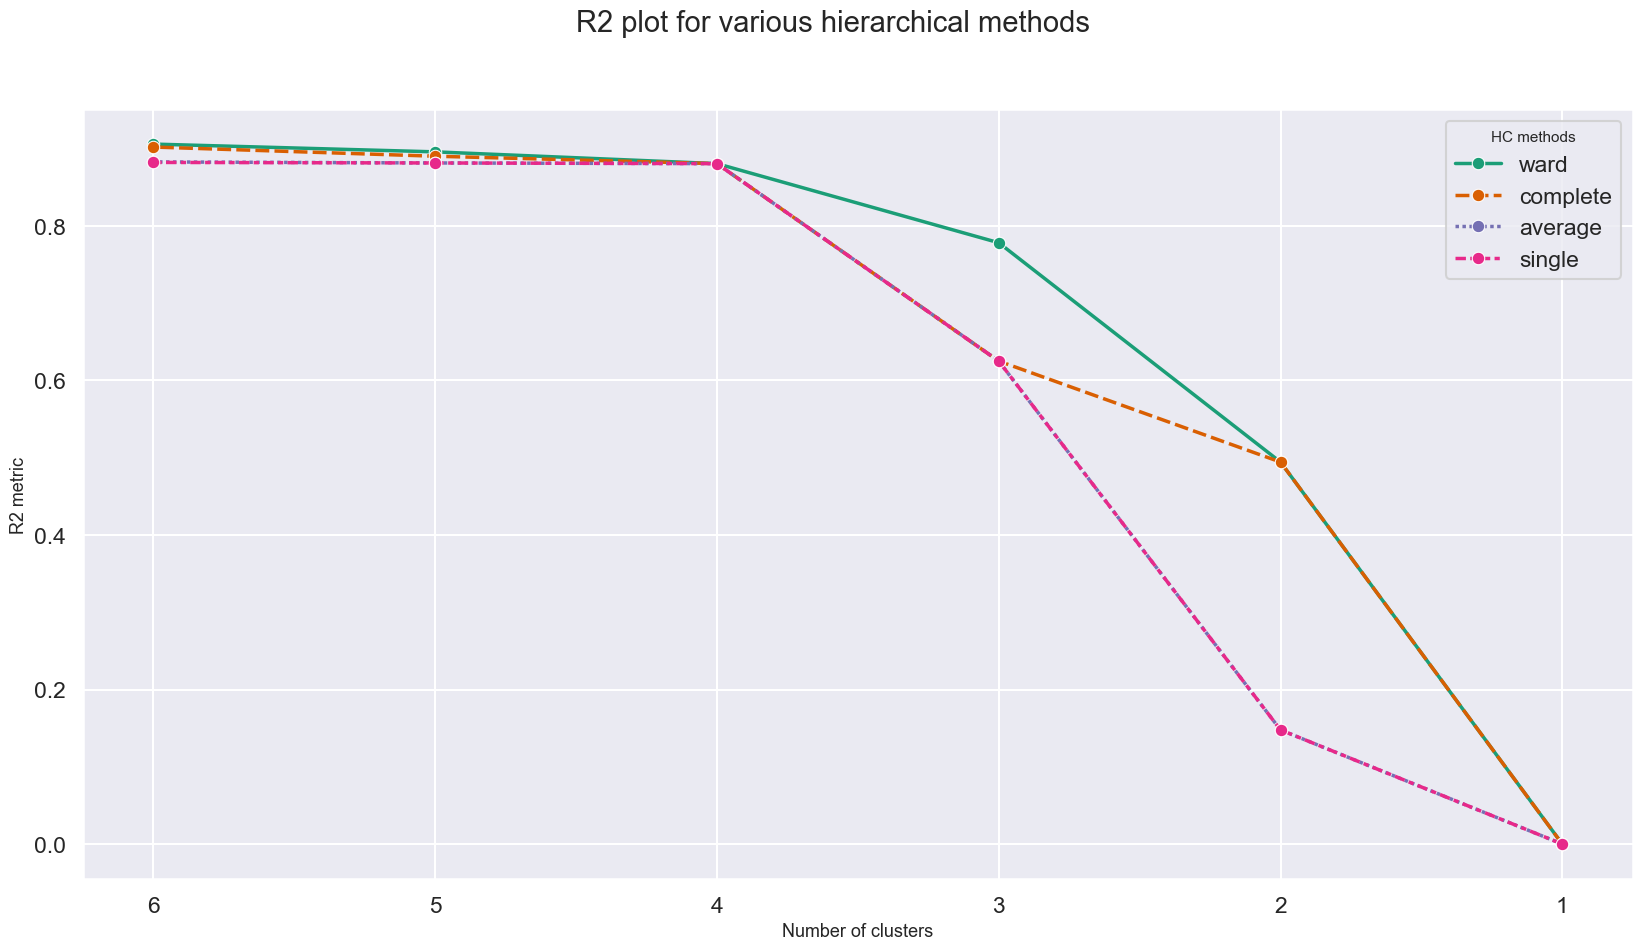

In [7]:
plot_r2_hc(insuccess_no)

##### Single

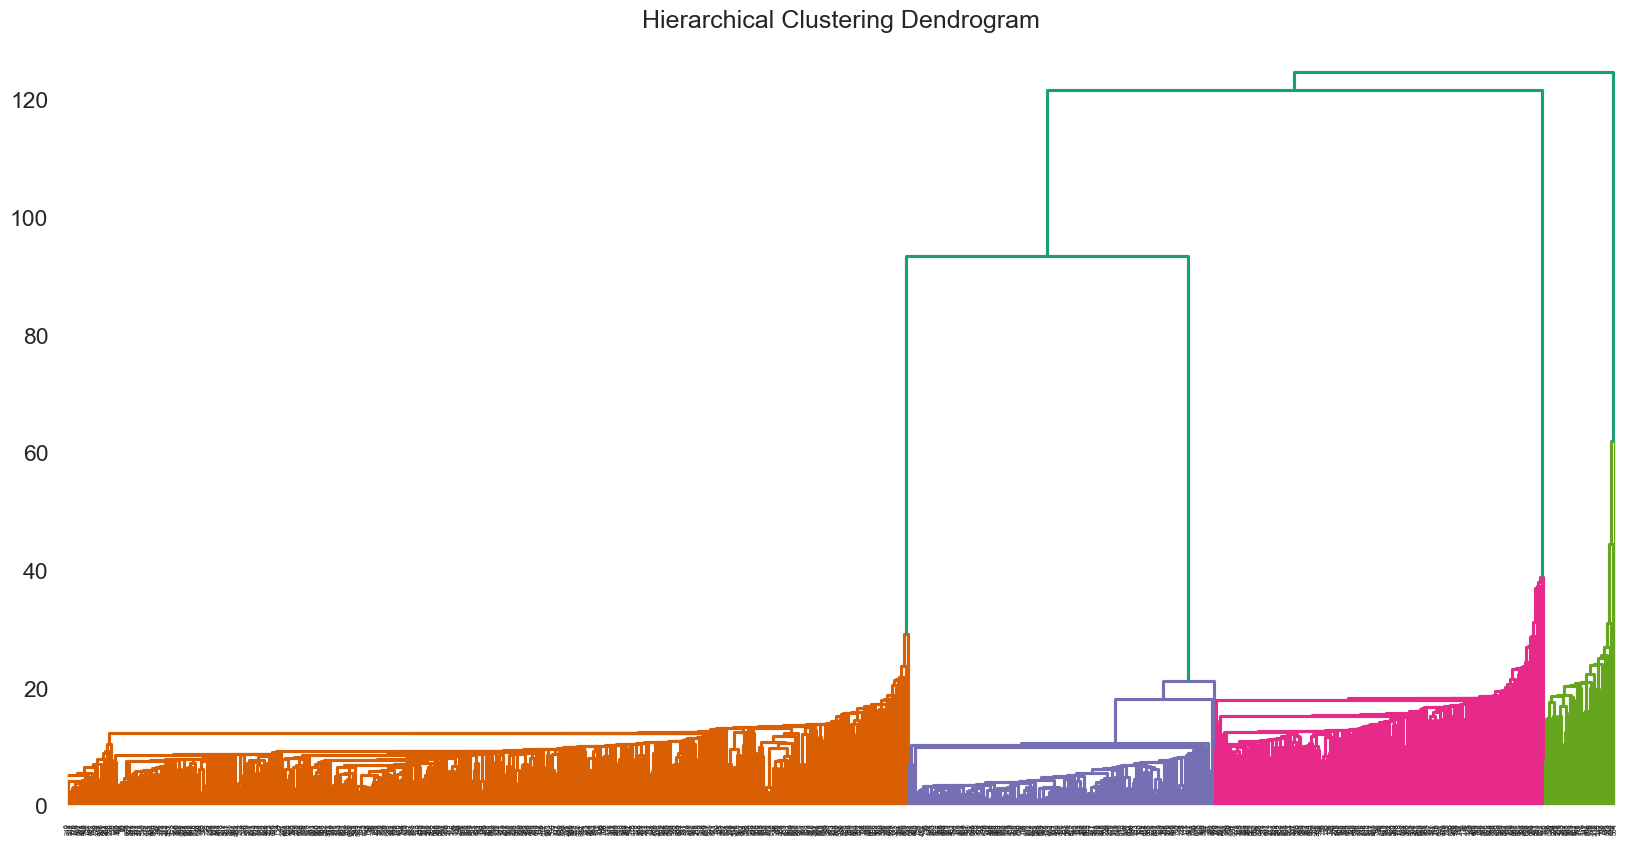

In [8]:
plot_dendrogram(insuccess_no, 'single')

In [9]:
insuccess['no_single3'] = AgglomerativeClustering(
    linkage='single', n_clusters=3
    ).fit_predict(insuccess_no)

insuccess['no_single4'] = AgglomerativeClustering(
    linkage='single', n_clusters=4
    ).fit_predict(insuccess_no)

In [10]:
clusters_comparison(insuccess, 'no_single3', 'no_single4')

,no_single4 0 Cluster,no_single4 1 Cluster,no_single4 2 Cluster,no_single4 3 Cluster
no_single3 0 Cluster,0,496,0,180
no_single3 1 Cluster,42,0,0,0
no_single3 2 Cluster,0,0,194,0


##### Complete

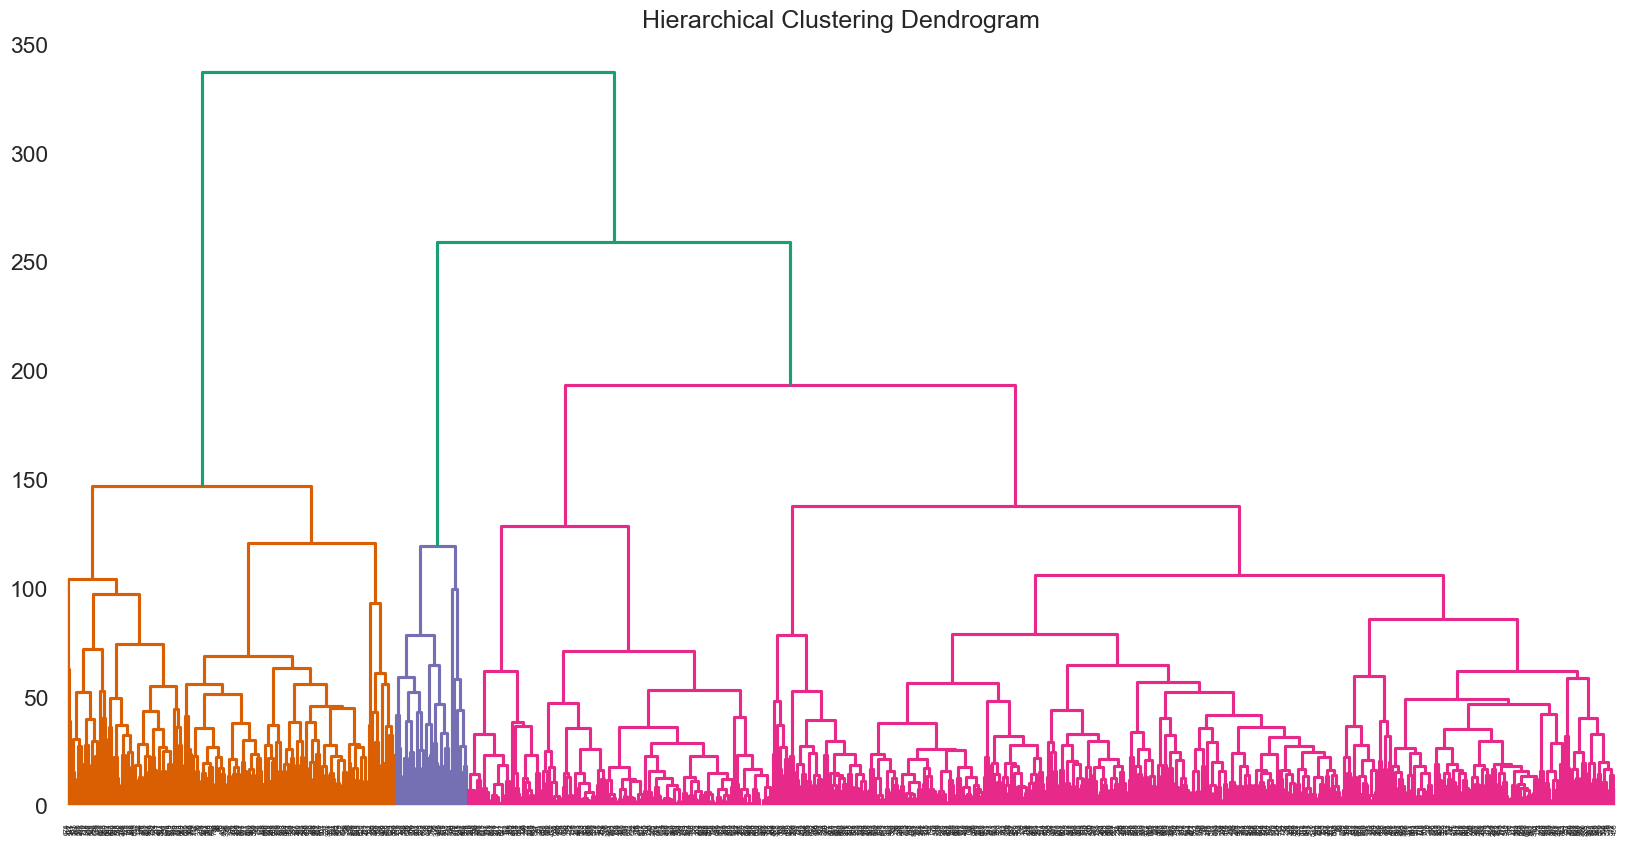

In [11]:
plot_dendrogram(insuccess_no, 'complete')

In [12]:
insuccess['no_complete3'] = AgglomerativeClustering(
    linkage='complete', n_clusters=3
    ).fit_predict(insuccess_no)

insuccess['no_complete4'] = AgglomerativeClustering(
    linkage='complete', n_clusters=4
    ).fit_predict(insuccess_no)

In [13]:
clusters_comparison(insuccess, 'no_single3', 'no_complete3')

,no_complete3 0 Cluster,no_complete3 1 Cluster,no_complete3 2 Cluster
no_single3 0 Cluster,676,0,0
no_single3 1 Cluster,0,0,42
no_single3 2 Cluster,0,194,0


In [14]:
clusters_comparison(insuccess, 'no_single4', 'no_complete4')

,no_complete4 0 Cluster,no_complete4 1 Cluster,no_complete4 2 Cluster,no_complete4 3 Cluster
no_single4 0 Cluster,0,0,42,0
no_single4 1 Cluster,0,496,0,0
no_single4 2 Cluster,194,0,0,0
no_single4 3 Cluster,0,0,0,180


##### Ward

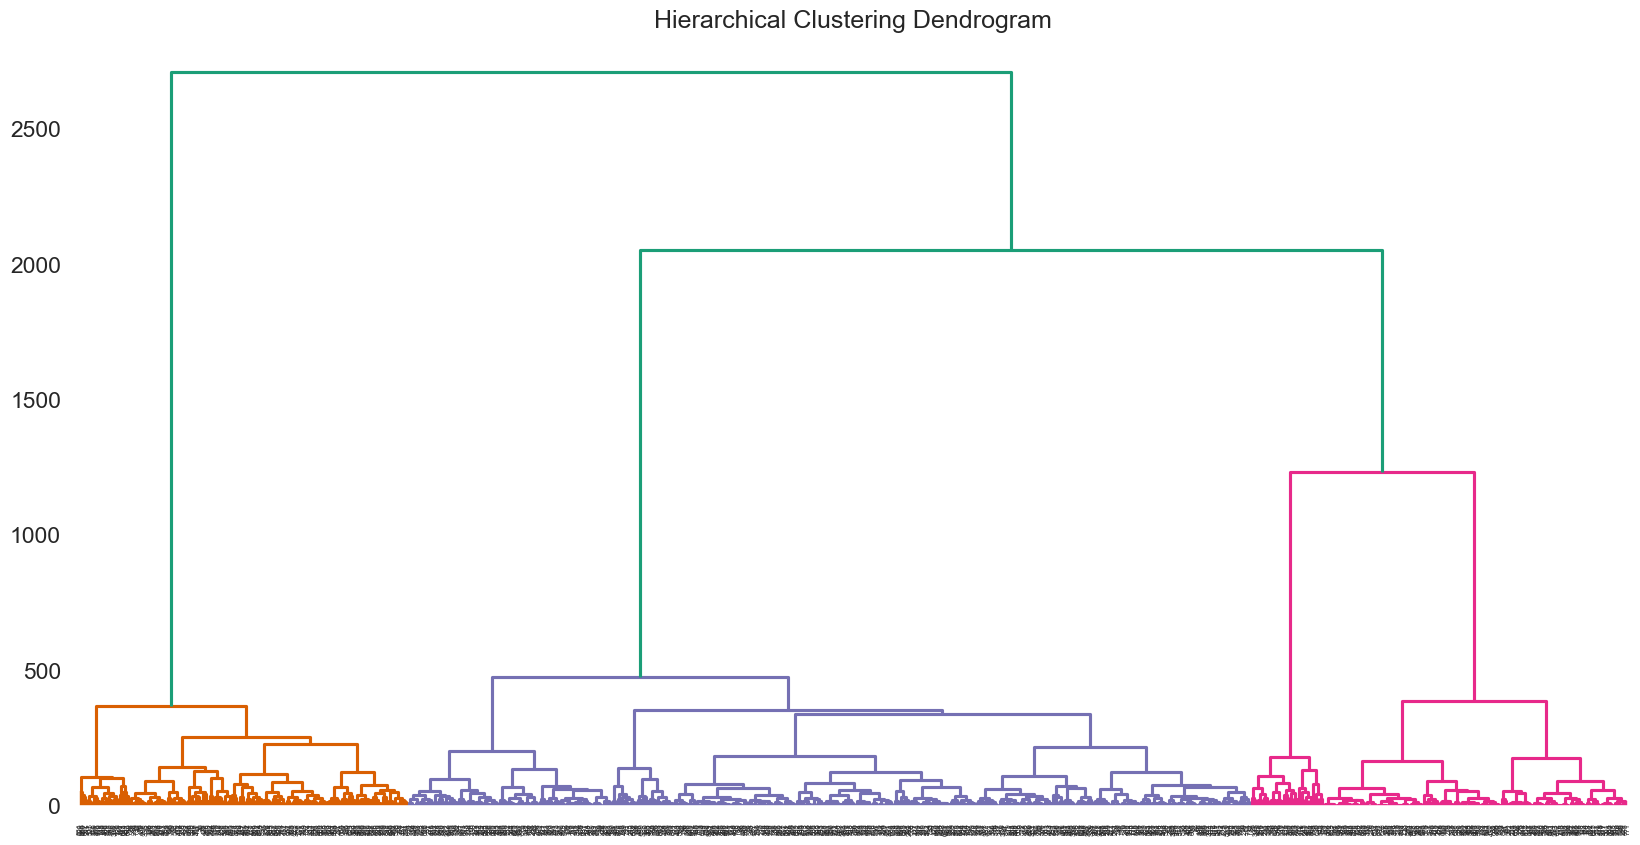

In [15]:
plot_dendrogram(insuccess_no, 'ward')

In [16]:
insuccess['no_ward3'] = AgglomerativeClustering(
    linkage='ward', n_clusters=3
    ).fit_predict(insuccess_no)

insuccess['no_ward4'] = AgglomerativeClustering(
    linkage='ward', n_clusters=4
    ).fit_predict(insuccess_no)

In [17]:
clusters_comparison(insuccess, 'no_single3', 'no_ward3')

,no_ward3 0 Cluster,no_ward3 1 Cluster,no_ward3 2 Cluster
no_single3 0 Cluster,180,0,496
no_single3 1 Cluster,42,0,0
no_single3 2 Cluster,0,194,0


In [18]:
clusters_comparison(insuccess, 'no_single4', 'no_ward4')

,no_ward4 0 Cluster,no_ward4 1 Cluster,no_ward4 2 Cluster,no_ward4 3 Cluster
no_single4 0 Cluster,0,0,0,42
no_single4 1 Cluster,496,0,0,0
no_single4 2 Cluster,0,194,0,0
no_single4 3 Cluster,0,0,180,0


##### Average

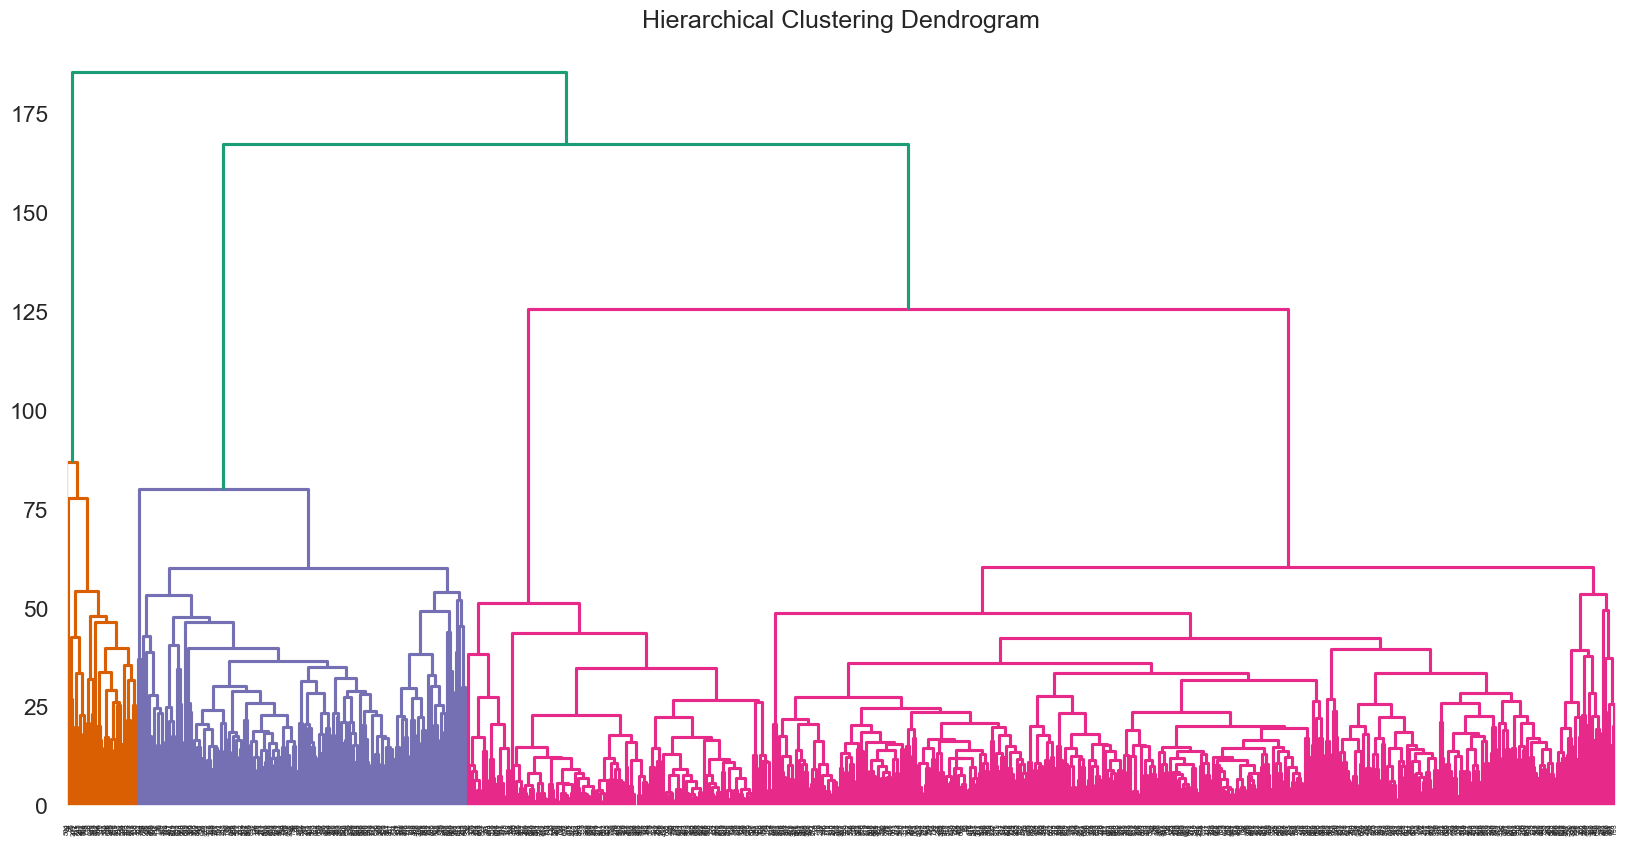

In [19]:
plot_dendrogram(insuccess_no, 'average')

In [20]:
insuccess['no_average3'] = AgglomerativeClustering(
    linkage='average', n_clusters=3
    ).fit_predict(insuccess_no)

insuccess['no_average4'] = AgglomerativeClustering(
    linkage='average', n_clusters=4
    ).fit_predict(insuccess_no)

In [21]:
clusters_comparison(insuccess, 'no_average3', 'no_single3')

,no_single3 0 Cluster,no_single3 1 Cluster,no_single3 2 Cluster
no_average3 0 Cluster,676,0,0
no_average3 1 Cluster,0,42,0
no_average3 2 Cluster,0,0,194


In [22]:
clusters_comparison(insuccess, 'no_average4', 'no_single4')

,no_single4 0 Cluster,no_single4 1 Cluster,no_single4 2 Cluster,no_single4 3 Cluster
no_average4 0 Cluster,42,0,0,0
no_average4 1 Cluster,0,496,0,0
no_average4 2 Cluster,0,0,194,0
no_average4 3 Cluster,0,0,0,180


##### MeanShift

In [23]:
no_meanshift = MeanShift(bandwidth=80, bin_seeding=True, n_jobs=-1).fit(insuccess_no)
insuccess['no_meanshift'] = no_meanshift.labels_

In [24]:
clusters_comparison(insuccess, 'no_meanshift', 'no_single4')

,no_single4 0 Cluster,no_single4 1 Cluster,no_single4 2 Cluster,no_single4 3 Cluster
no_meanshift 0 Cluster,0,496,0,0
no_meanshift 1 Cluster,0,0,194,0
no_meanshift 2 Cluster,0,0,0,180
no_meanshift 3 Cluster,42,0,0,0


##### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


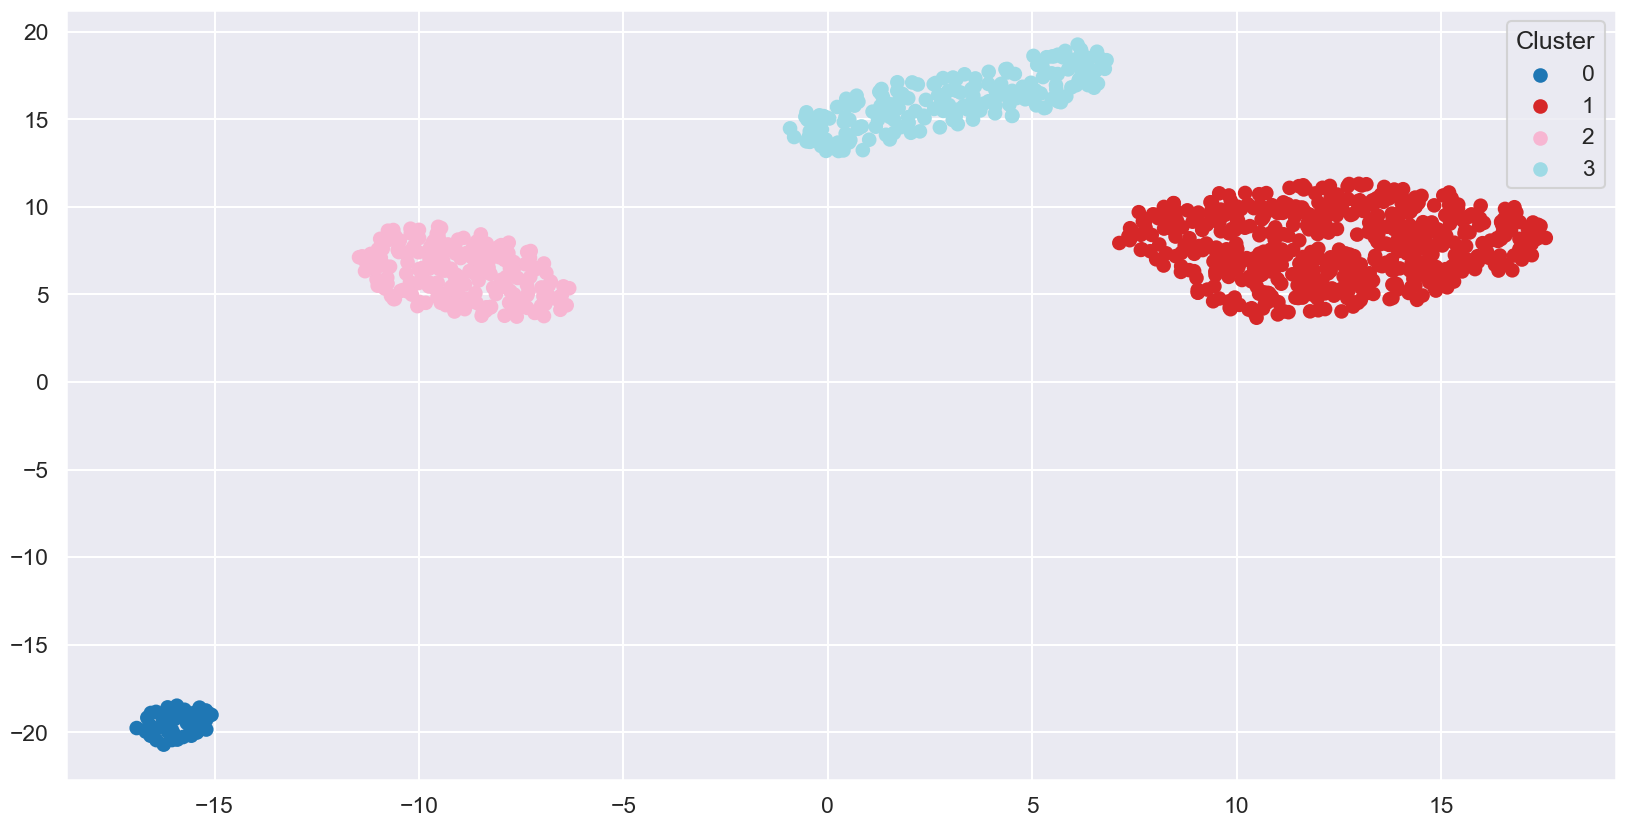

In [25]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(insuccess_no)
visualize_dimensionality_reduction(umap_embedding, insuccess['no_single4'])

#### Robust

In [26]:
insuccess_rb = insuccess_rb[performance_cols]

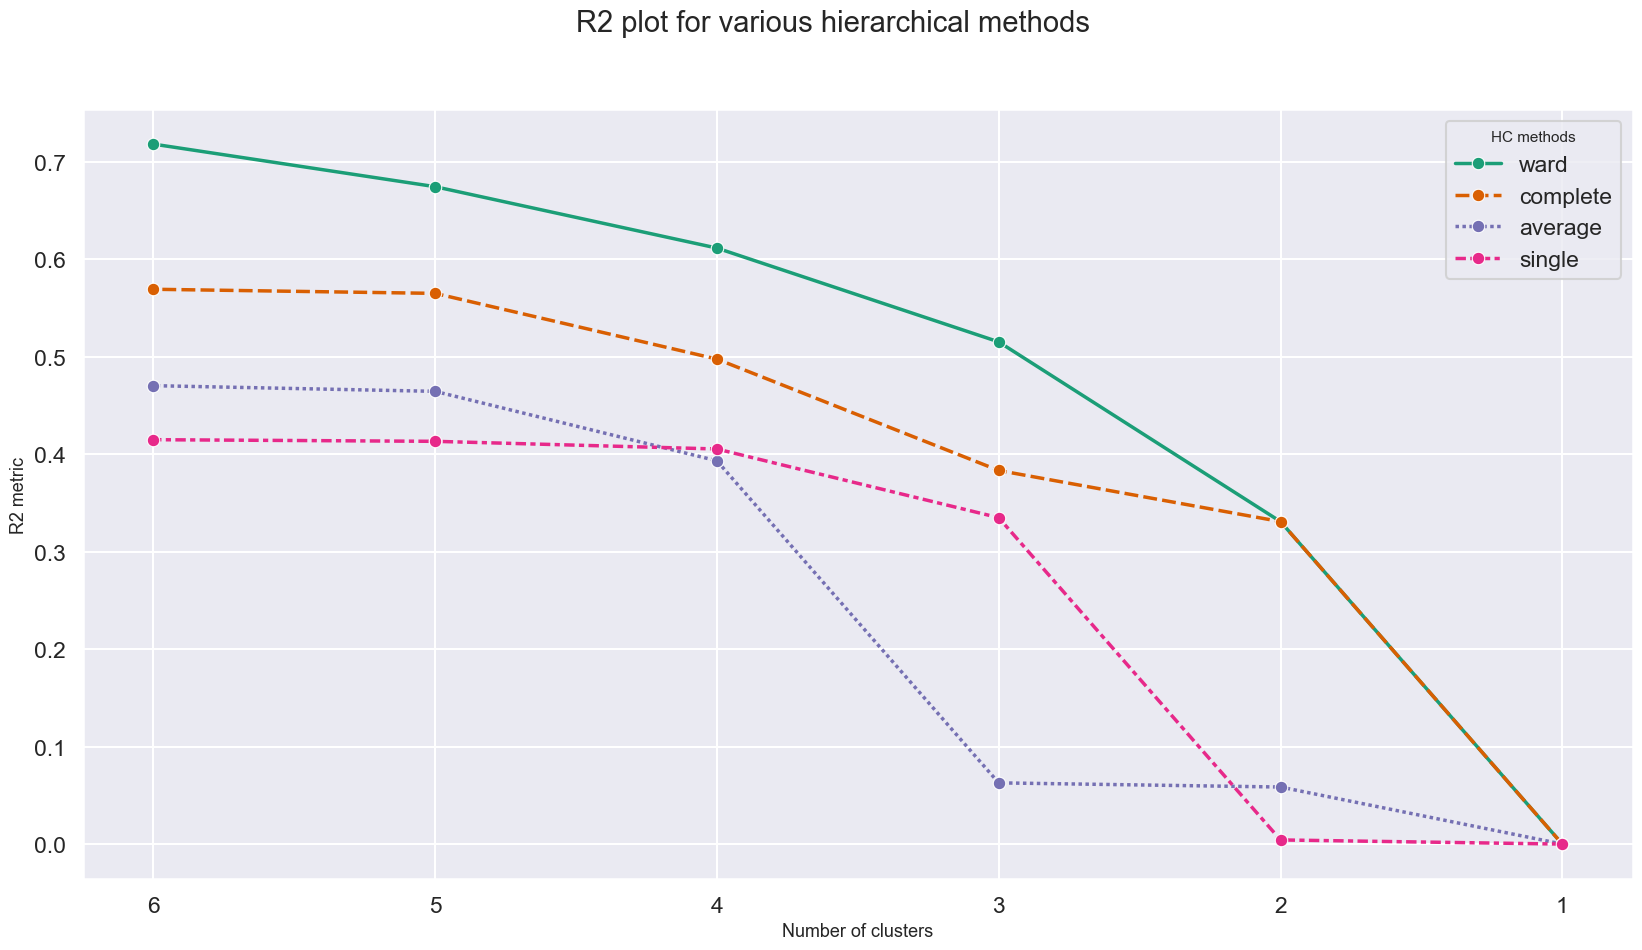

In [27]:
plot_r2_hc(insuccess_rb)

##### Complete

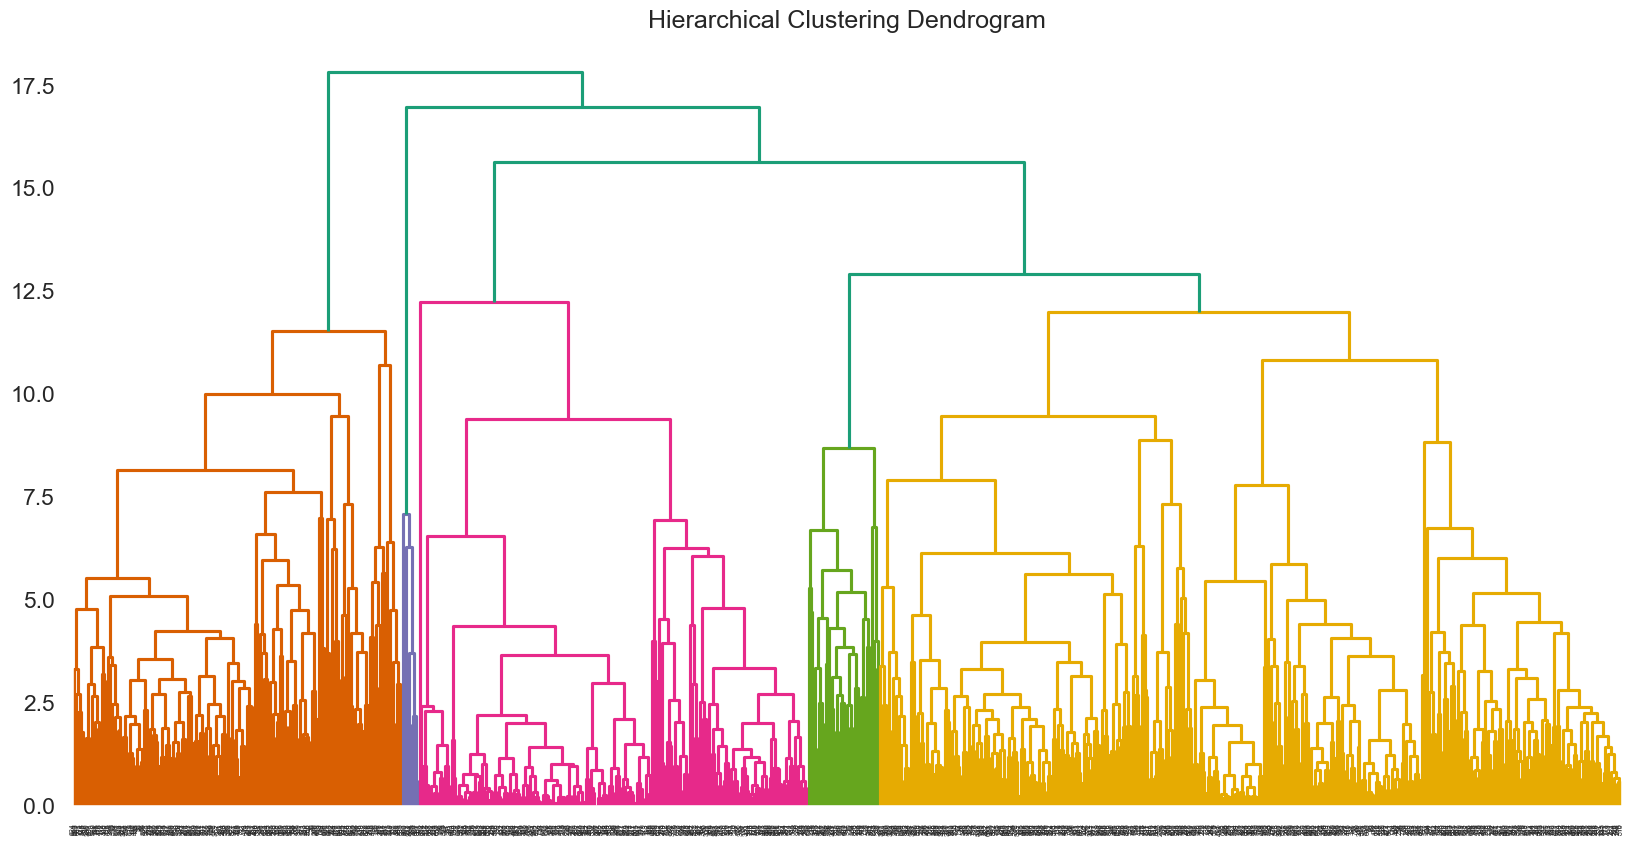

In [29]:
plot_dendrogram(insuccess_rb, 'complete')

In [30]:
insuccess['rb_complete2'] = AgglomerativeClustering(
    linkage='complete', n_clusters=2
    ).fit_predict(insuccess_rb)

insuccess['rb_complete4'] = AgglomerativeClustering(
    linkage='complete', n_clusters=4
    ).fit_predict(insuccess_rb)

##### Ward

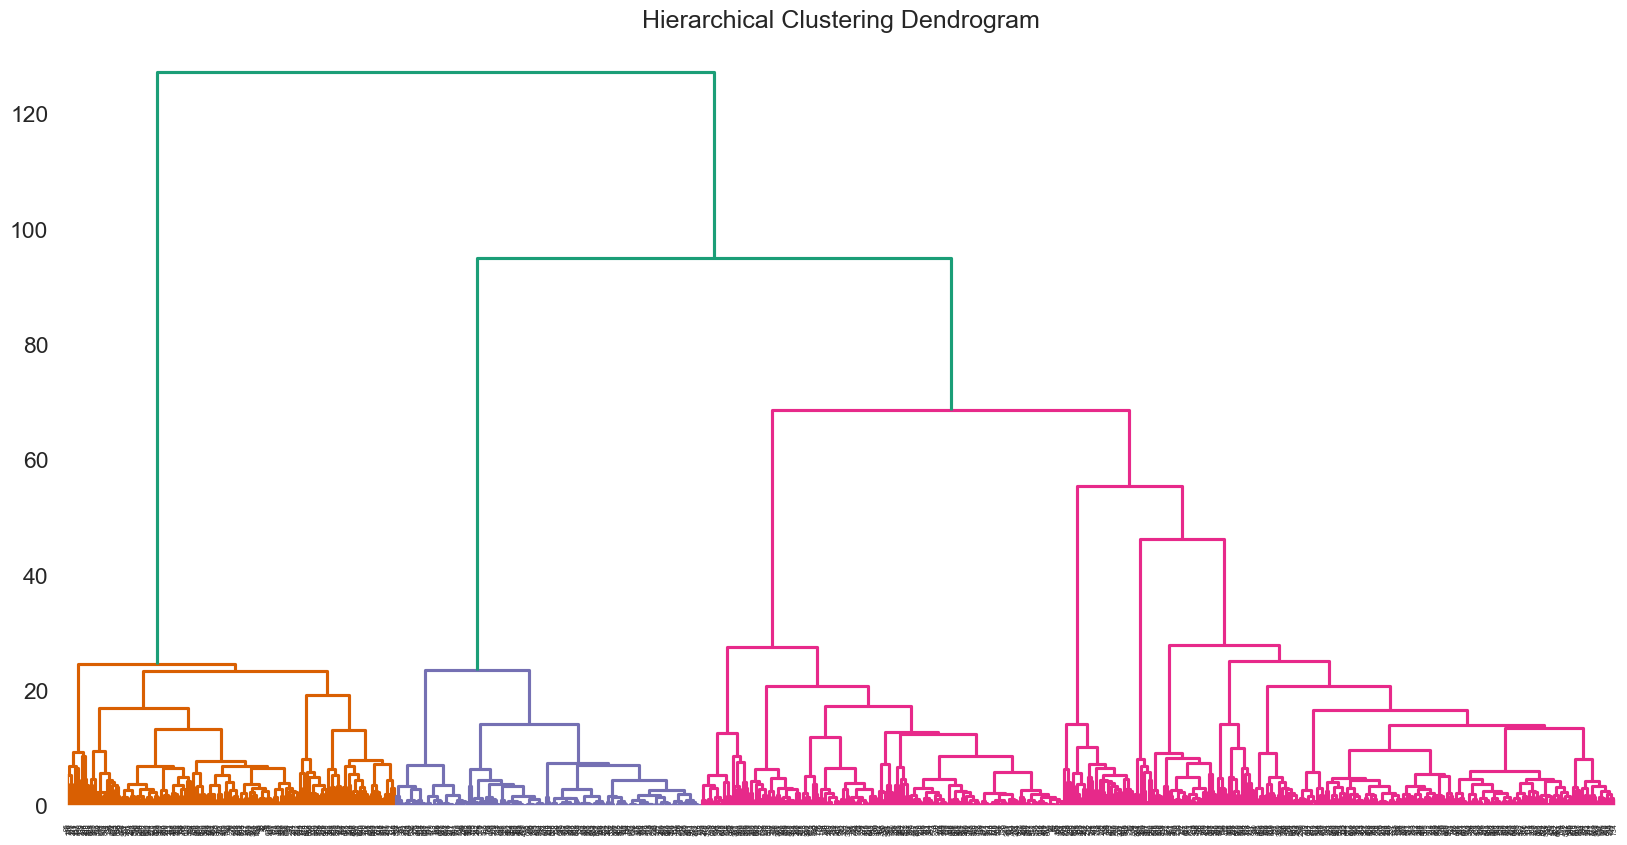

In [31]:
plot_dendrogram(insuccess_rb, 'ward')

In [41]:
insuccess['rb_ward2'] = AgglomerativeClustering(
    linkage='ward', n_clusters=2
    ).fit_predict(insuccess_rb)

insuccess['rb_ward3'] = AgglomerativeClustering(
    linkage='ward', n_clusters=3
    ).fit_predict(insuccess_rb)

insuccess['rb_ward4'] = AgglomerativeClustering(
    linkage='ward', n_clusters=4
    ).fit_predict(insuccess_rb)

In [43]:
clusters_comparison(insuccess, 'rb_complete2', 'rb_ward2')

,rb_ward2 0 Cluster,rb_ward2 1 Cluster
rb_complete2 0 Cluster,718,0
rb_complete2 1 Cluster,0,194


In [47]:
clusters_comparison(insuccess, 'rb_complete2', 'rb_ward3')

,rb_ward3 0 Cluster,rb_ward3 1 Cluster,rb_ward3 2 Cluster
rb_complete2 0 Cluster,538,0,180
rb_complete2 1 Cluster,0,194,0


In [45]:
clusters_comparison(insuccess, 'rb_complete4', 'rb_ward4')

,rb_ward4 0 Cluster,rb_ward4 1 Cluster,rb_ward4 2 Cluster,rb_ward4 3 Cluster
rb_complete4 0 Cluster,315,120,44,0
rb_complete4 1 Cluster,0,93,136,0
rb_complete4 2 Cluster,10,0,0,0
rb_complete4 3 Cluster,0,0,0,194


In [48]:
clusters_comparison(insuccess, 'no_single4', 'rb_ward4')

,rb_ward4 0 Cluster,rb_ward4 1 Cluster,rb_ward4 2 Cluster,rb_ward4 3 Cluster
no_single4 0 Cluster,42,0,0,0
no_single4 1 Cluster,283,213,0,0
no_single4 2 Cluster,0,0,0,194
no_single4 3 Cluster,0,0,180,0


##### MeanShift

In [68]:
rb_meanshift = MeanShift(bandwidth=6.2, bin_seeding=True, n_jobs=-1).fit(insuccess_rb)
insuccess['rb_meanshift'] = rb_meanshift.labels_

In [69]:
clusters_comparison(insuccess, 'no_meanshift', 'rb_meanshift')

,rb_meanshift 0 Cluster,rb_meanshift 1 Cluster,rb_meanshift 2 Cluster
no_meanshift 0 Cluster,496,0,0
no_meanshift 1 Cluster,0,194,0
no_meanshift 2 Cluster,180,0,0
no_meanshift 3 Cluster,0,0,42


In [74]:
clusters_comparison(insuccess, 'rb_ward3', 'rb_meanshift')

,rb_meanshift 0 Cluster,rb_meanshift 1 Cluster,rb_meanshift 2 Cluster
rb_ward3 0 Cluster,496,0,42
rb_ward3 1 Cluster,0,194,0
rb_ward3 2 Cluster,180,0,0


##### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


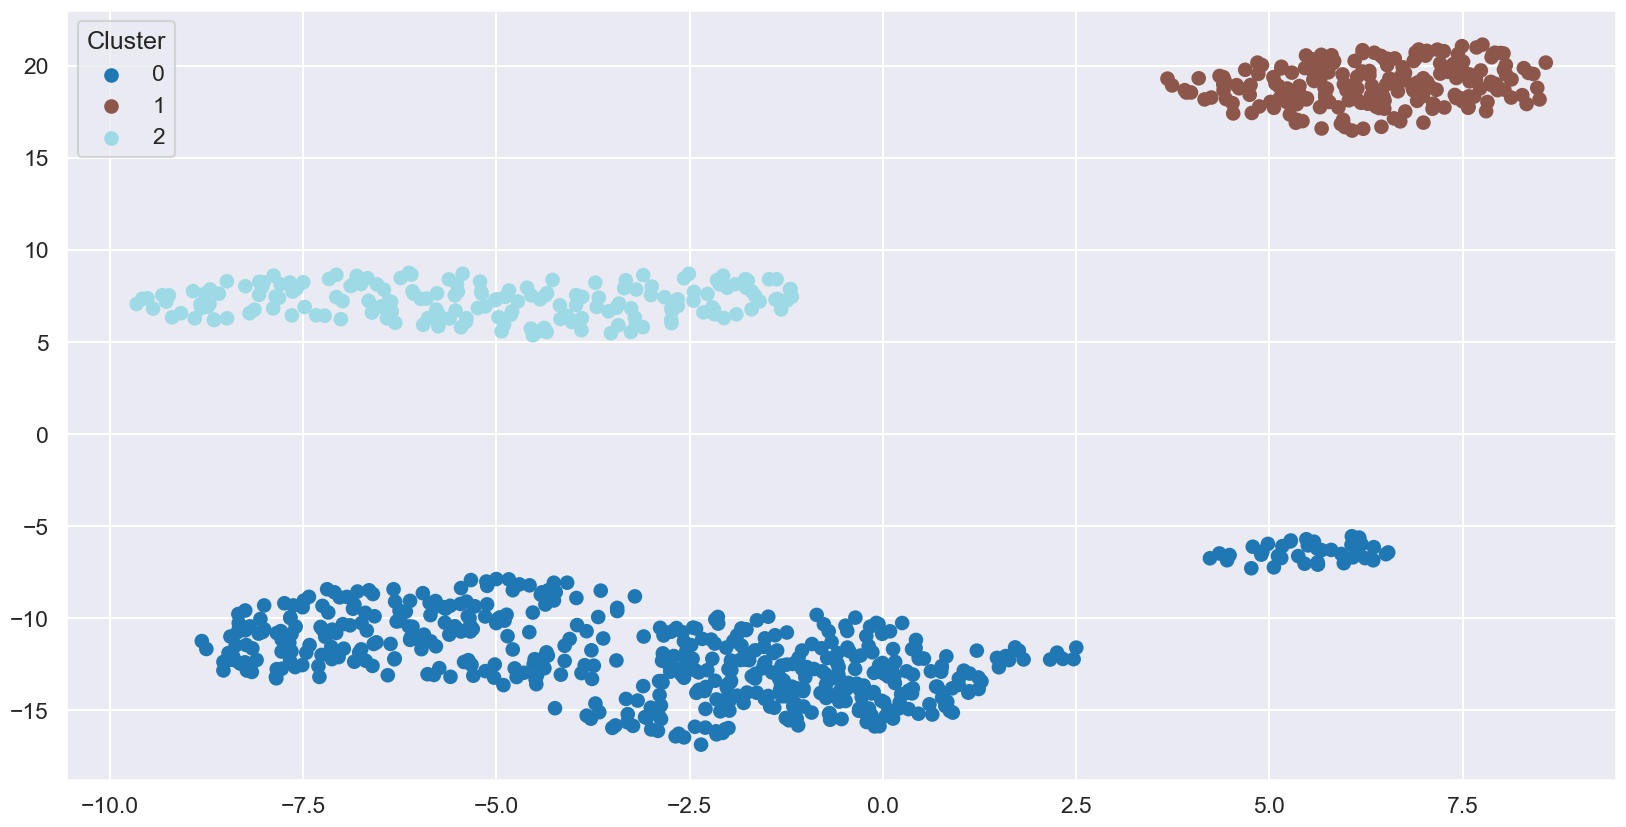

In [75]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(insuccess_rb)
visualize_dimensionality_reduction(umap_embedding, insuccess['rb_ward3'])

### Success

#### No scaling

In [32]:
success_no = success_no[performance_cols]

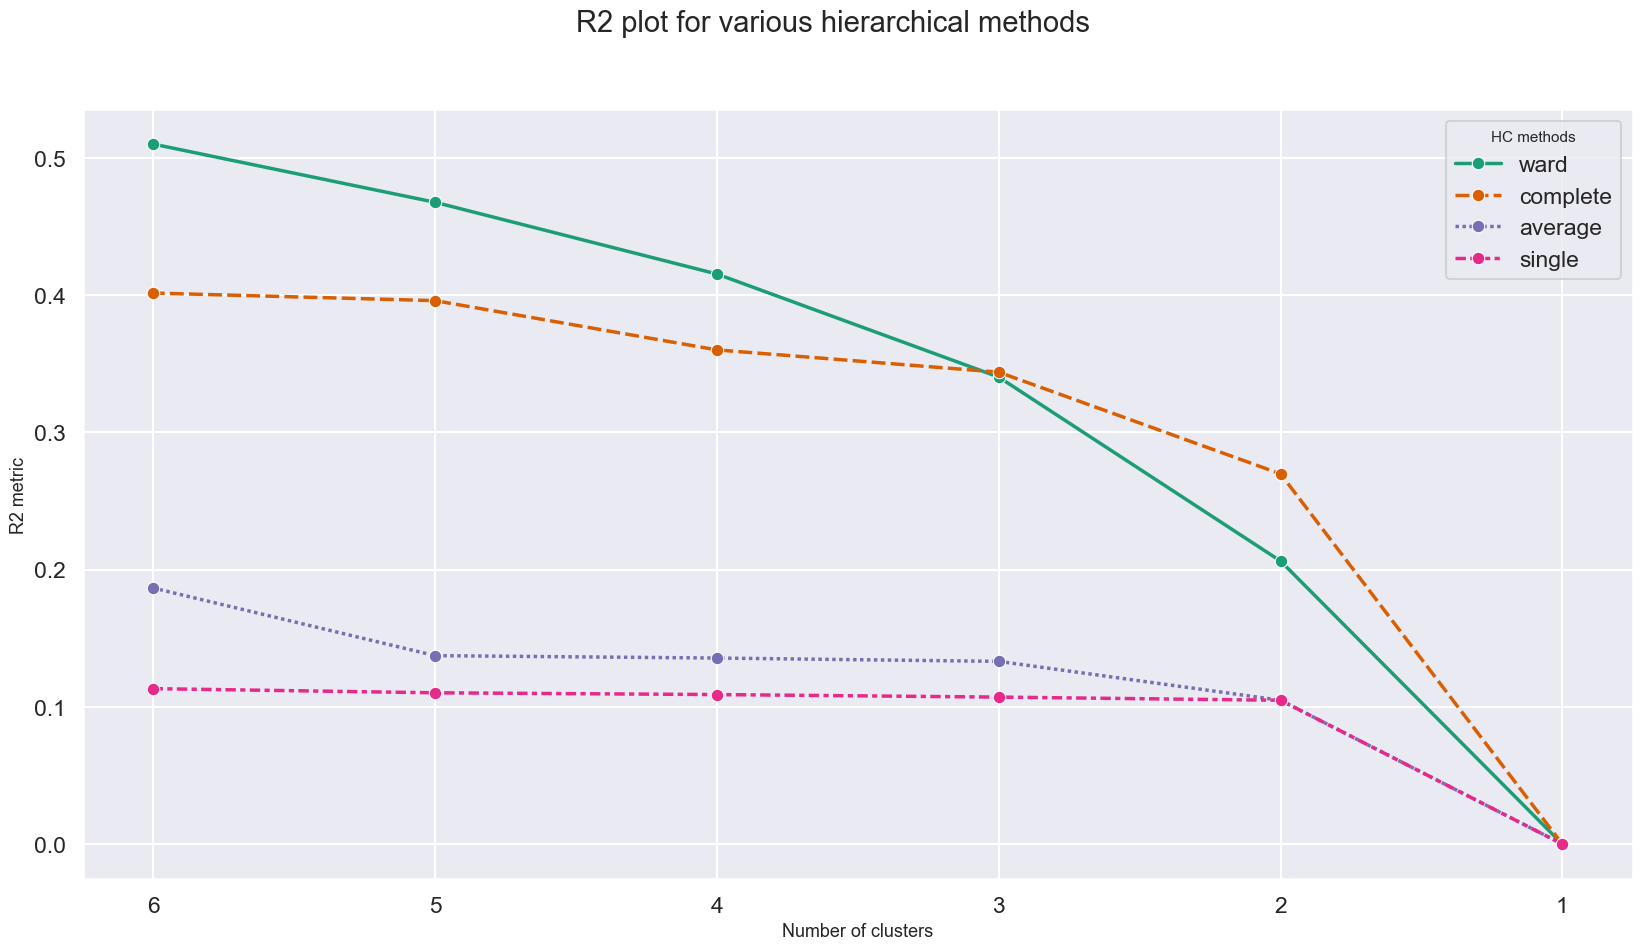

In [91]:
plot_r2_hc(success_no)

##### Complete

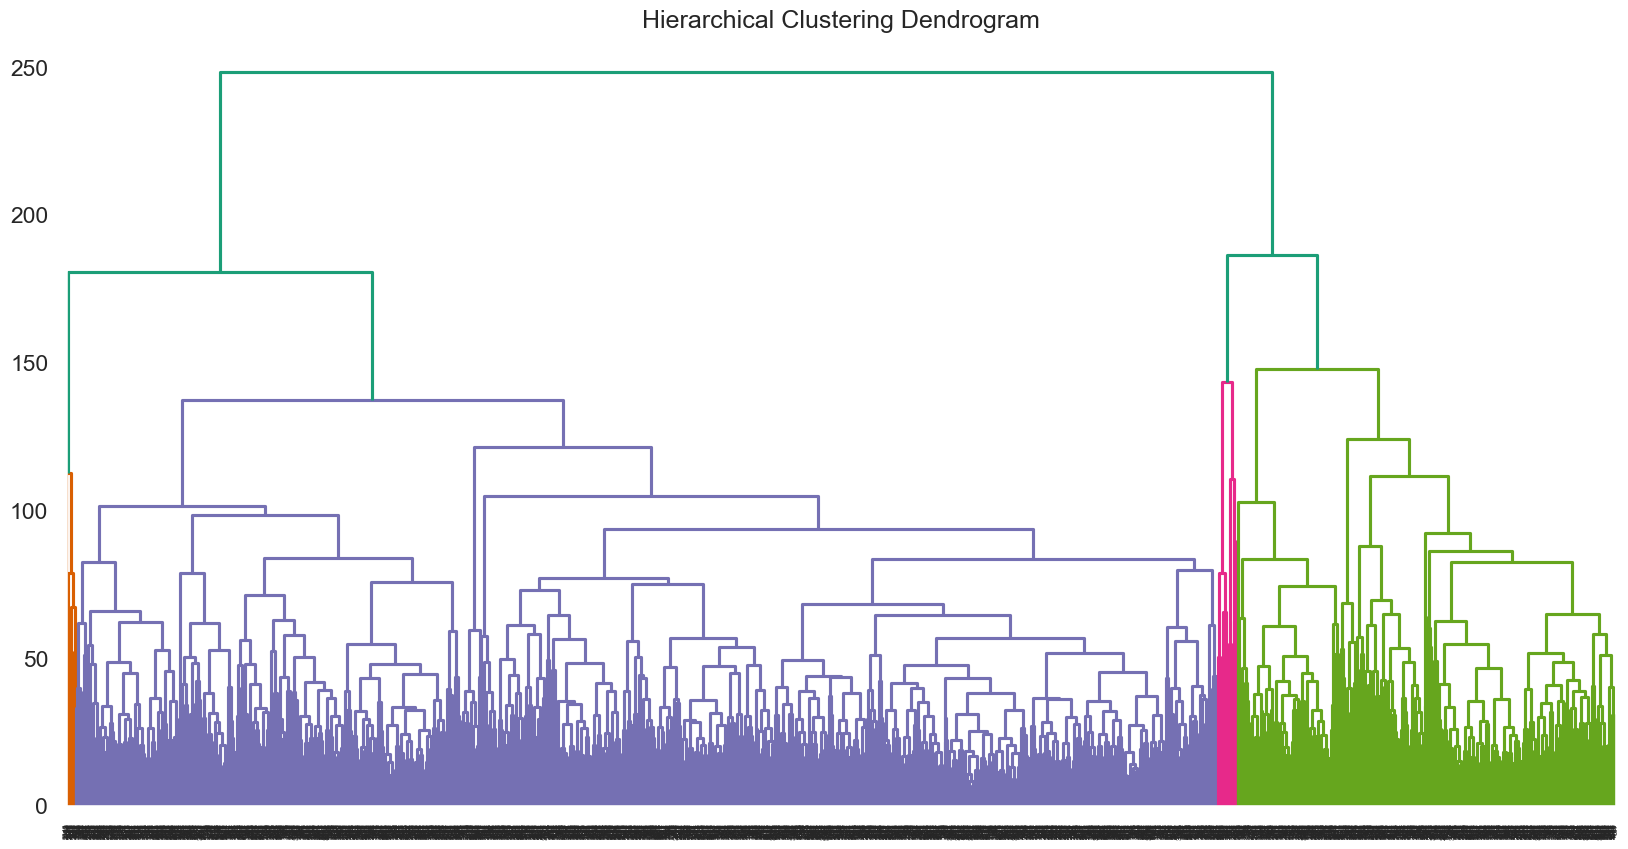

In [92]:
plot_dendrogram(success_no, 'complete')

In [33]:
success['no_complete2'] = AgglomerativeClustering(
    linkage='complete', n_clusters=2
    ).fit_predict(success_no)

In [34]:
groupby_mean(success, 'no_complete2')

no_complete2,0,1
Course area_Art,0.081021,0.062045
Course area_Business sciences,0.182020,0.212562
Course area_Engineering and related techniques,0.063263,0.021831
Course area_Health,0.211987,0.219456
Course area_Information and journalism,0.082131,0.079280
Course area_Personal services,0.032186,0.067024
Course area_Social services,0.105438,0.149368
Course area_Teacher training/trainers and education sciences,0.029967,0.053236
Course area_Veterinary sciences,0.092120,0.077748
Marital status,0.914539,0.889314


##### Ward

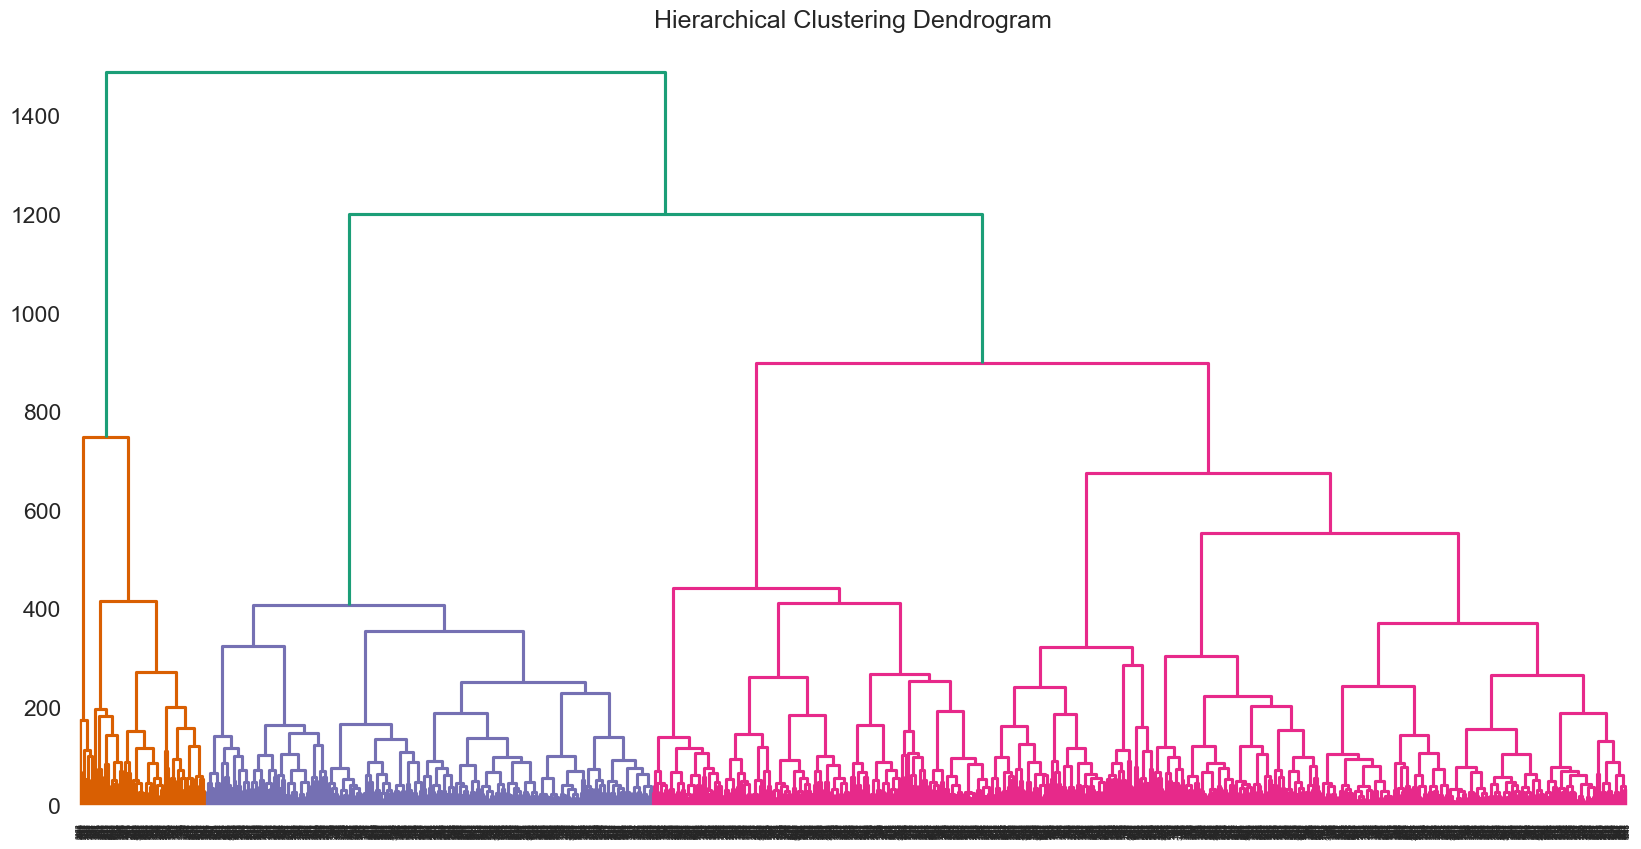

In [94]:
plot_dendrogram(success_no, 'ward')

In [35]:
success['no_ward2'] = AgglomerativeClustering(
    linkage='ward', n_clusters=2
    ).fit_predict(success_no)

success['no_ward3'] = AgglomerativeClustering(
    linkage='ward', n_clusters=3
    ).fit_predict(success_no)

success['no_ward4'] = AgglomerativeClustering(
    linkage='ward', n_clusters=4
    ).fit_predict(success_no)

In [96]:
clusters_comparison(success, 'no_complete2', 'no_ward2')

,no_ward2 0 Cluster,no_ward2 1 Cluster
no_complete2 0 Cluster,617,284
no_complete2 1 Cluster,2604,7


In [97]:
clusters_comparison(success, 'no_ward2', 'no_ward3')

,no_ward3 0 Cluster,no_ward3 1 Cluster,no_ward3 2 Cluster
no_ward2 0 Cluster,2210,0,1011
no_ward2 1 Cluster,0,291,0


In [36]:
groupby_mean(success, 'no_ward2')

no_ward2,0,1
Course area_Art,0.060540,0.137457
Course area_Business sciences,0.207389,0.175258
Course area_Engineering and related techniques,0.024837,0.116838
Course area_Health,0.227259,0.109966
Course area_Information and journalism,0.079789,0.082474
Course area_Personal services,0.061472,0.020619
Course area_Social services,0.142502,0.089347
Course area_Teacher training/trainers and education sciences,0.049674,0.020619
Course area_Veterinary sciences,0.079789,0.099656
Marital status,0.898168,0.869416


##### MeanShift

In [104]:
no_meanshift = MeanShift(bandwidth=70, bin_seeding=True, n_jobs=-1).fit(success_no)
success['no_meanshift'] = no_meanshift.labels_

In [105]:
clusters_comparison(success, 'no_meanshift', 'no_complete2')

,no_complete2 0 Cluster,no_complete2 1 Cluster
no_meanshift 0 Cluster,847,2611
no_meanshift 1 Cluster,54,0


##### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


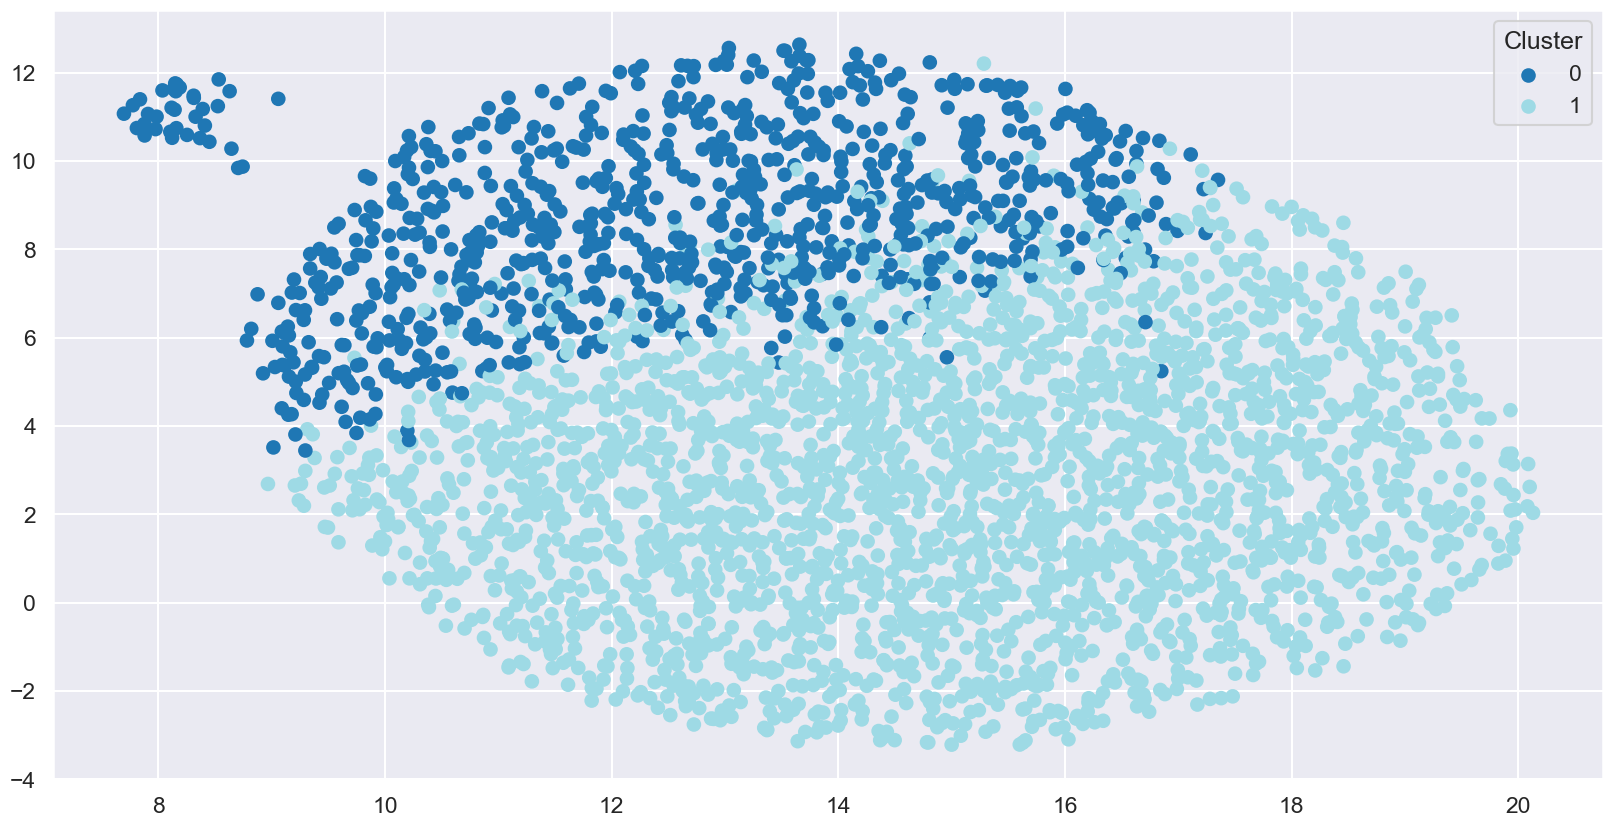

In [125]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(success_no)
visualize_dimensionality_reduction(umap_embedding, success['no_complete2'])

#### Robust

In [107]:
success_rb = success_rb[performance_cols]

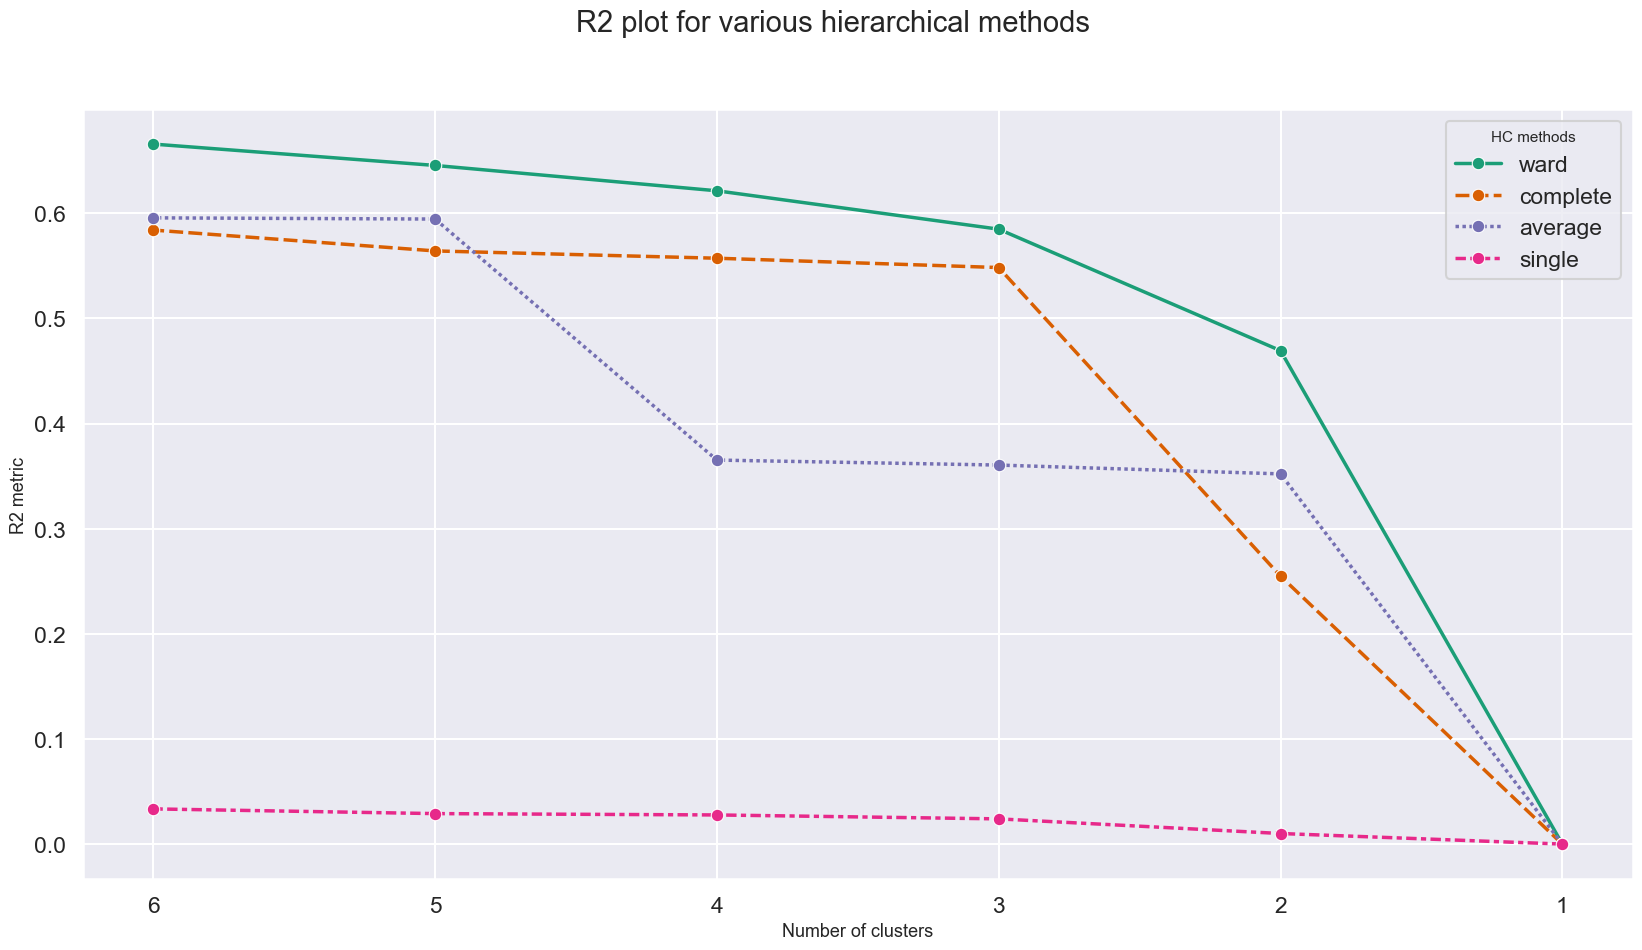

In [109]:
plot_r2_hc(success_rb)

##### Complete

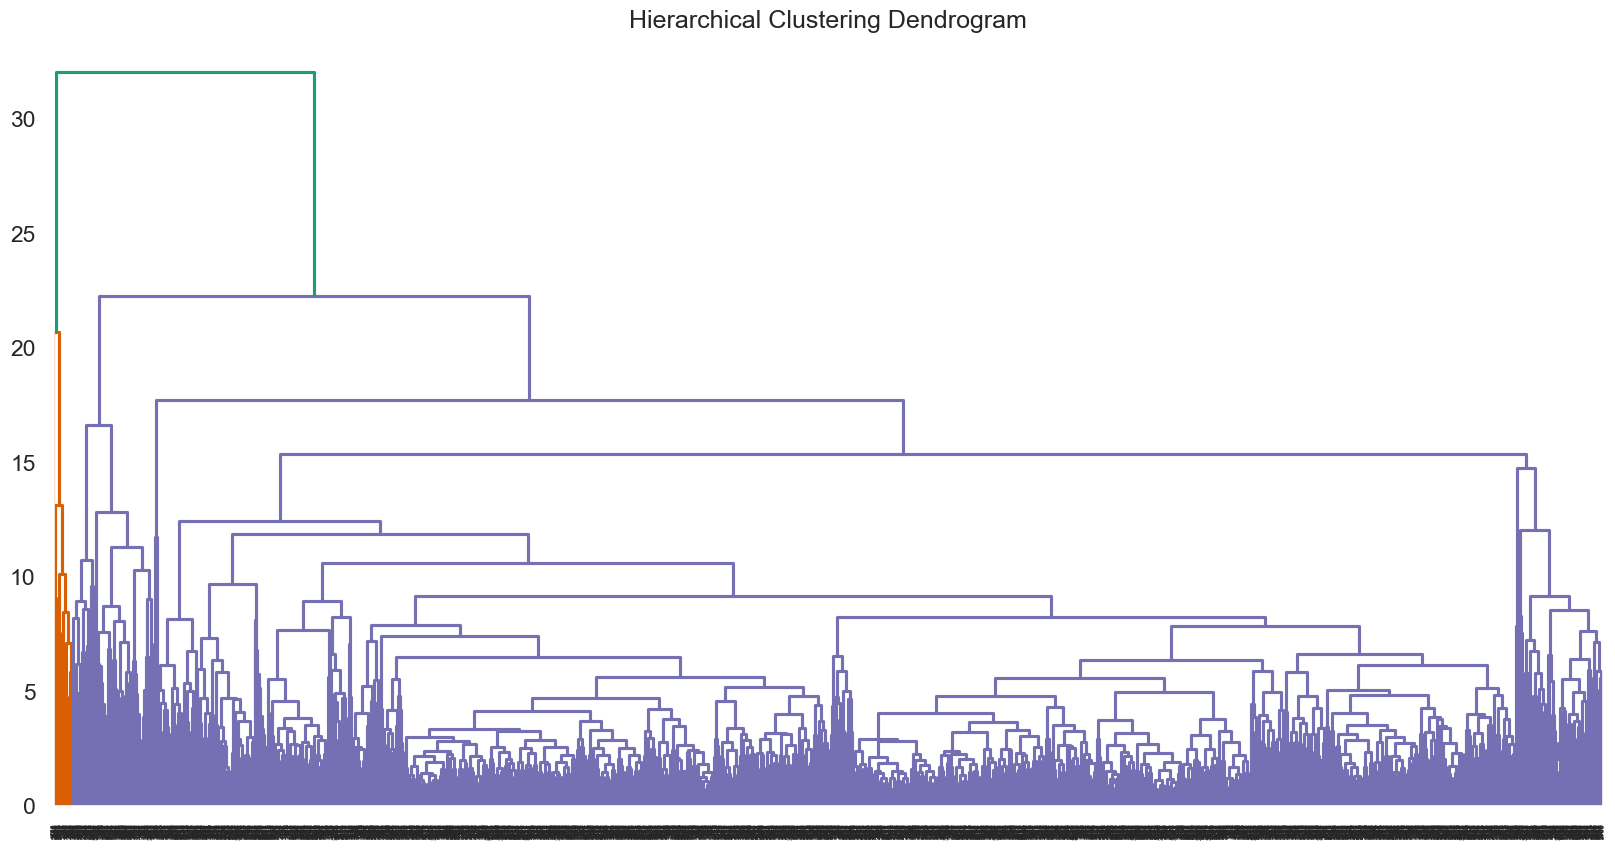

In [110]:
plot_dendrogram(success_rb, 'complete')

In [111]:
success['rb_complete2'] = AgglomerativeClustering(
    linkage='complete', n_clusters=2
    ).fit_predict(success_rb)

##### Ward

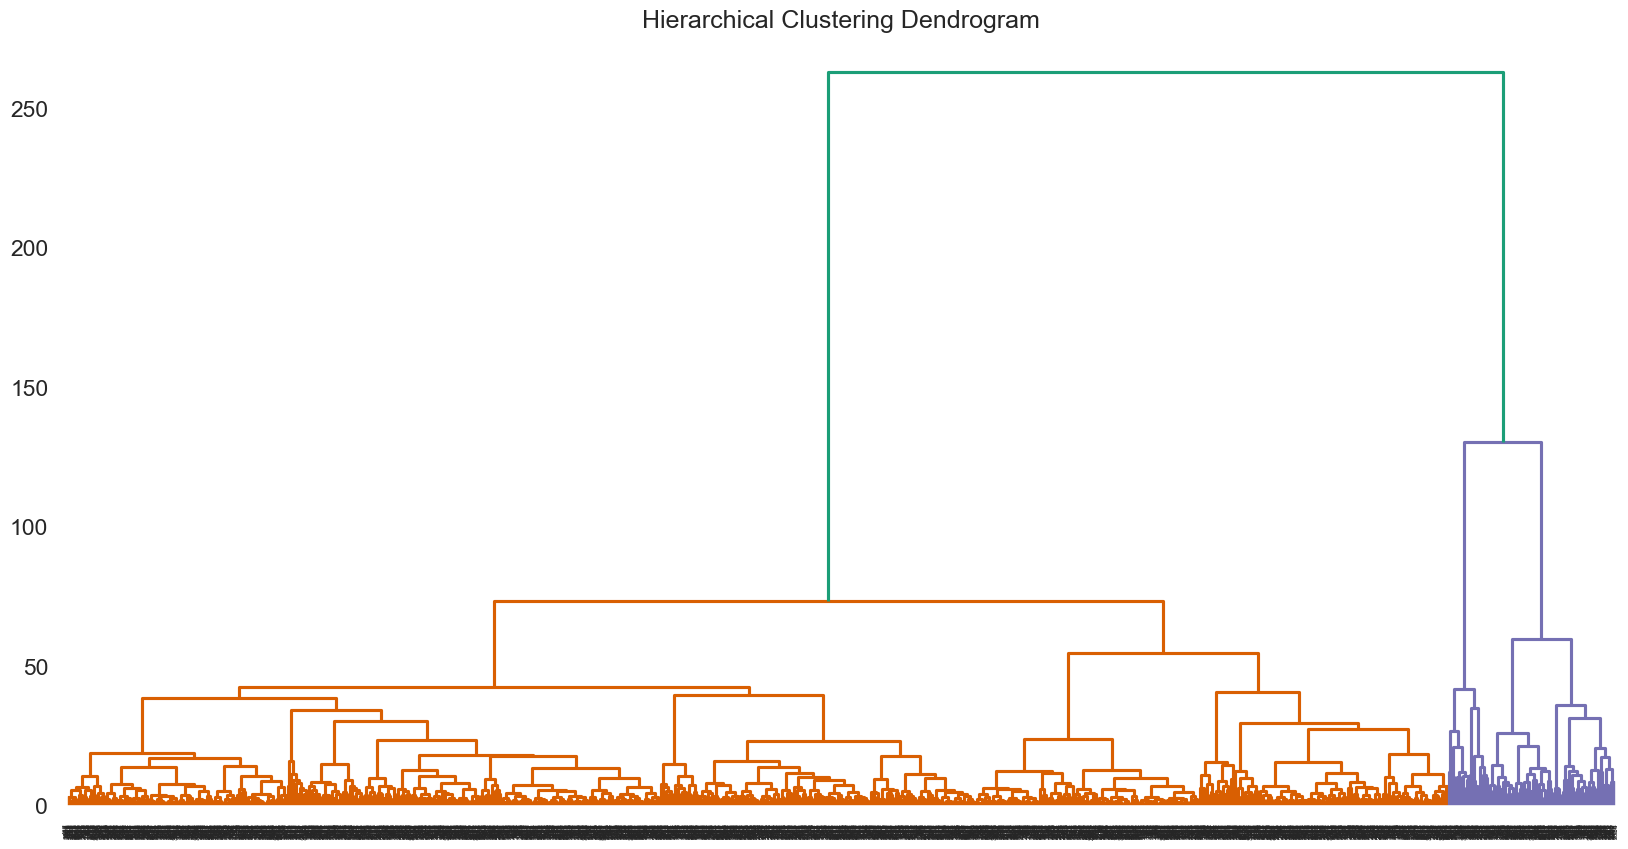

In [112]:
plot_dendrogram(success_rb, 'ward')

In [37]:
success['rb_ward2'] = AgglomerativeClustering(
    linkage='ward', n_clusters=2
    ).fit_predict(success_rb)

In [114]:
clusters_comparison(success, 'no_complete2', 'rb_ward2')

,rb_ward2 0 Cluster,rb_ward2 1 Cluster
no_complete2 0 Cluster,104,797
no_complete2 1 Cluster,274,2337


In [115]:
clusters_comparison(success, 'no_ward2', 'rb_ward2')

,rb_ward2 0 Cluster,rb_ward2 1 Cluster
no_ward2 0 Cluster,318,2903
no_ward2 1 Cluster,60,231


In [116]:
clusters_comparison(success, 'rb_complete2', 'rb_ward2')

,rb_ward2 0 Cluster,rb_ward2 1 Cluster
rb_complete2 0 Cluster,334,3134
rb_complete2 1 Cluster,44,0


In [38]:
groupby_mean(success, 'rb_ward2')

rb_ward2,0,1
Course area_Art,0.055849,0.190311
Course area_Business sciences,0.201986,0.235294
Course area_Engineering and related techniques,0.033509,0.020761
Course area_Health,0.232392,0.051903
Course area_Information and journalism,0.086255,0.010381
Course area_Personal services,0.061433,0.020761
Course area_Social services,0.132485,0.200692
Course area_Teacher training/trainers and education sciences,0.048402,0.034602
Course area_Veterinary sciences,0.082222,0.072664
Marital status,0.904747,0.795848


##### Average

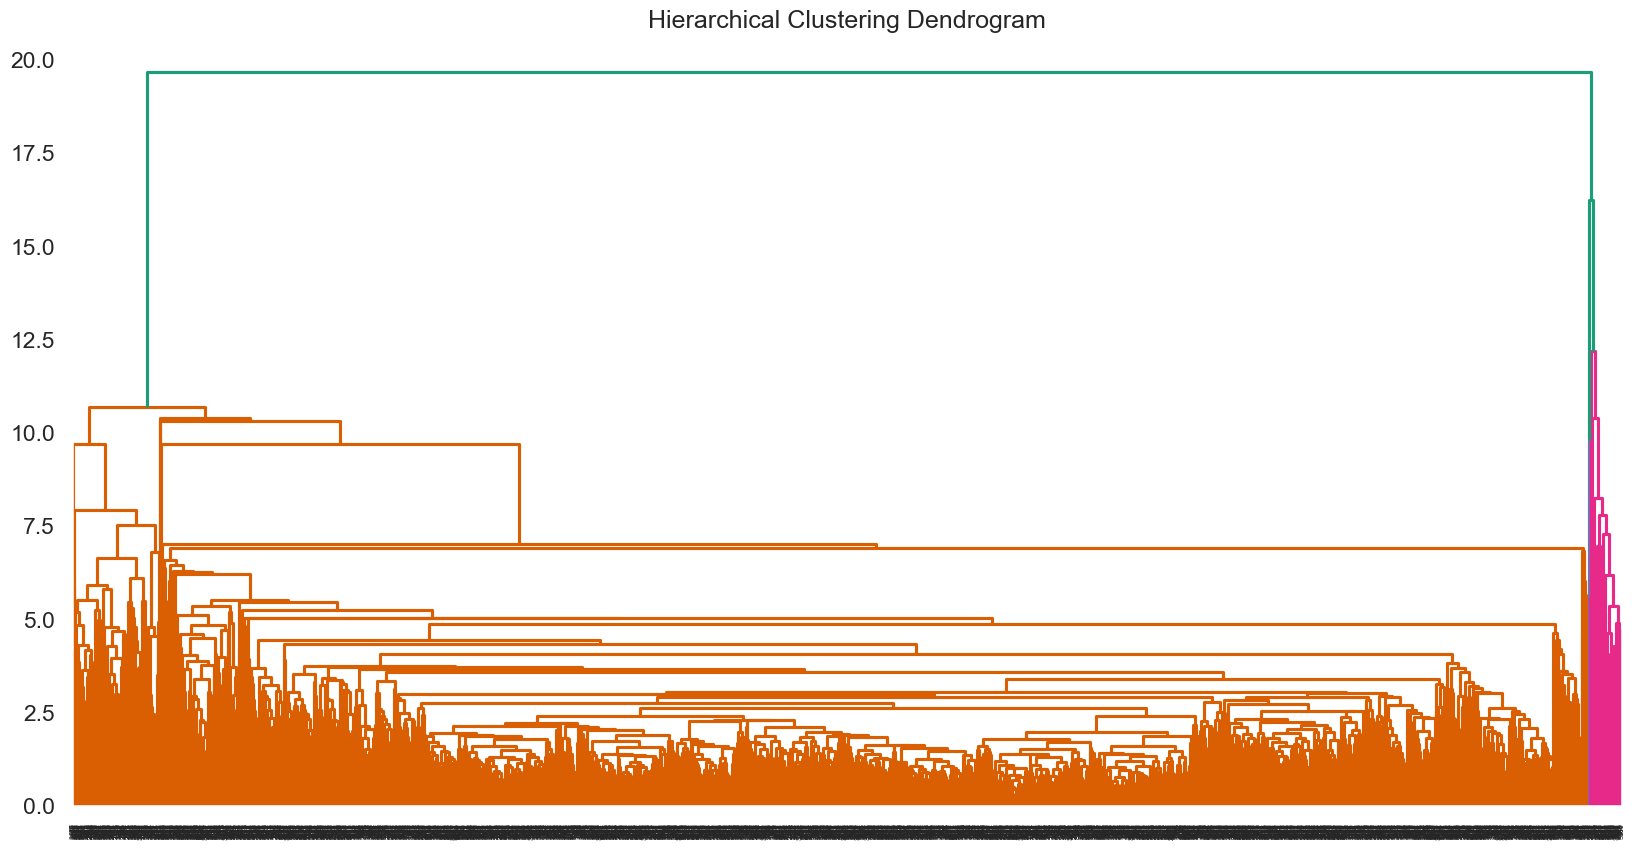

In [117]:
plot_dendrogram(success_rb, 'average')

In [119]:
success['rb_average2'] = AgglomerativeClustering(
    linkage='average', n_clusters=2
    ).fit_predict(success_rb)

In [120]:
clusters_comparison(success, 'rb_ward2', 'rb_average2')

,rb_average2 0 Cluster,rb_average2 1 Cluster
rb_ward2 0 Cluster,75,303
rb_ward2 1 Cluster,0,3134


##### MeanShift

In [121]:
rb_meanshift = MeanShift(bandwidth=7, bin_seeding=True, n_jobs=-1).fit(success_rb)
success['rb_meanshift'] = rb_meanshift.labels_
success['rb_meanshift'].value_counts()

rb_meanshift
0    3464
1      48
Name: count, dtype: int64

In [122]:
clusters_comparison(success, 'rb_ward2', 'rb_meanshift')

,rb_meanshift 0 Cluster,rb_meanshift 1 Cluster
rb_ward2 0 Cluster,330,48
rb_ward2 1 Cluster,3134,0


##### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


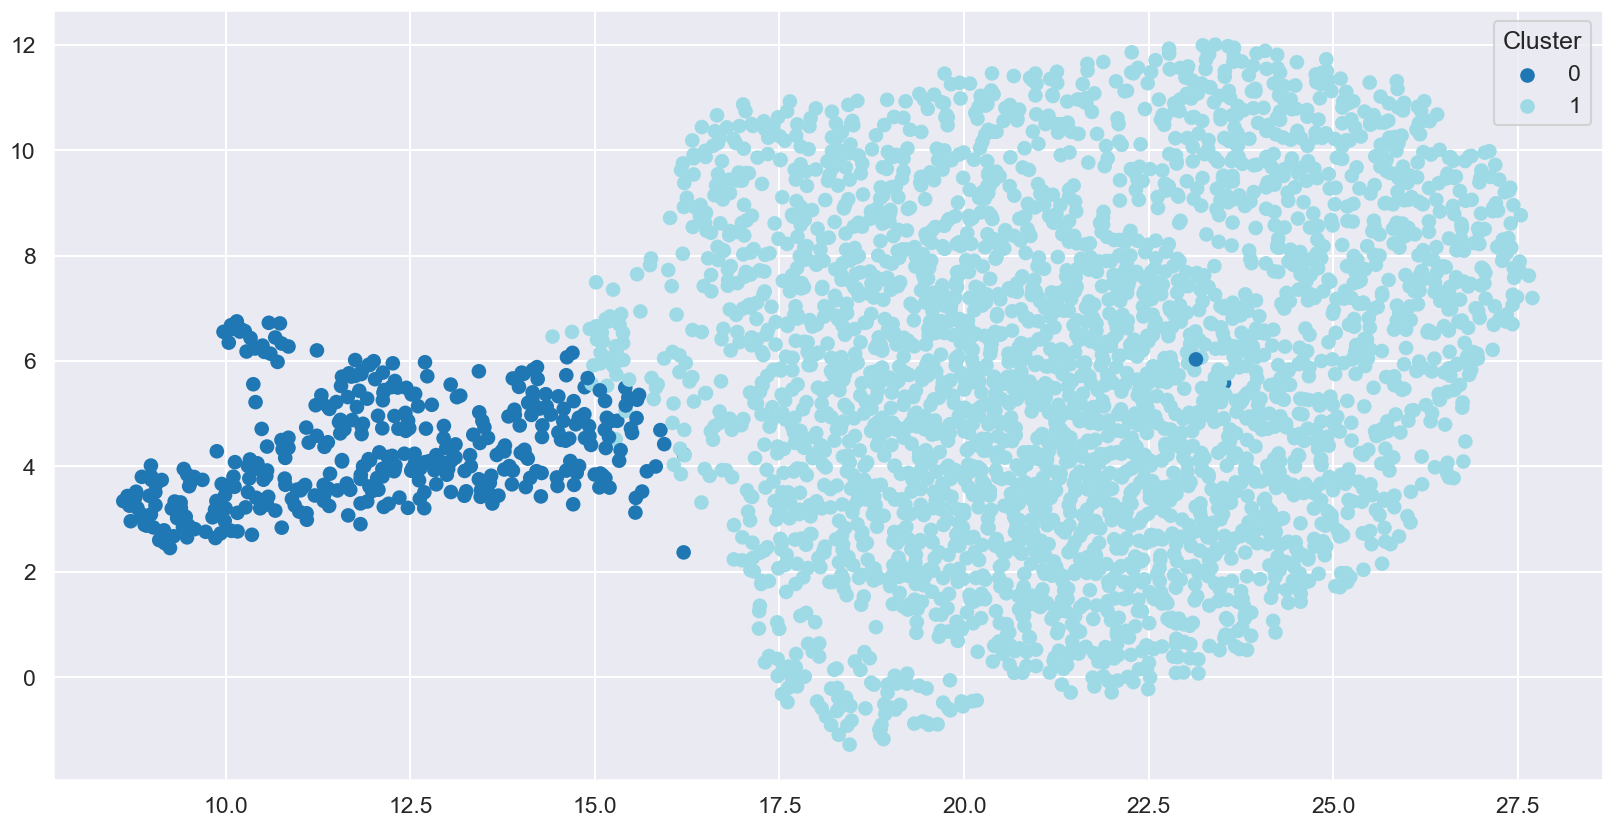

In [124]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(success_rb)
visualize_dimensionality_reduction(umap_embedding, success['rb_ward2'])